### ***Installing necessary packages for this project***

---

In [2]:
!pip install PyPDF2
!pip install PyMuPDF==1.18.14
!pip install nltk
!pip install docx2python
!pip install aspose-words
!pip install docx2python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



### ***Mounting google drive to import resumes*** 

---

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ***Overview of resume count and category*** 

---



In [5]:
import os
path = "/content/drive/MyDrive/resumes"
directories = os.listdir(path)
directories

['python',
 'java',
 'devops',
 'software developer',
 'solution architecht',
 'project manager',
 'Skills_keywords.csv']

In [4]:
resume_count = {}
for category in directories[:-1]:
  child_path = "/content/drive/MyDrive/resumes/"+ category
  resumes = os.listdir(child_path)
  resume_count[category] = len(resumes)
  print(category, 'count -', len(resumes))

python count - 52
java count - 27
devops count - 19
software developer count - 25
solution architecht count - 15
project manager count - 40


In [5]:
resume_count

{'python': 52,
 'java': 27,
 'devops': 19,
 'software developer': 25,
 'solution architecht': 15,
 'project manager': 40}

In [6]:
import pandas as pd
df = pd.DataFrame(resume_count.items(), columns=['Category', 'Count'])
df

,Category,Count
0,python,52
1,java,27
2,devops,19
3,software developer,25
4,solution architecht,15
5,project manager,40


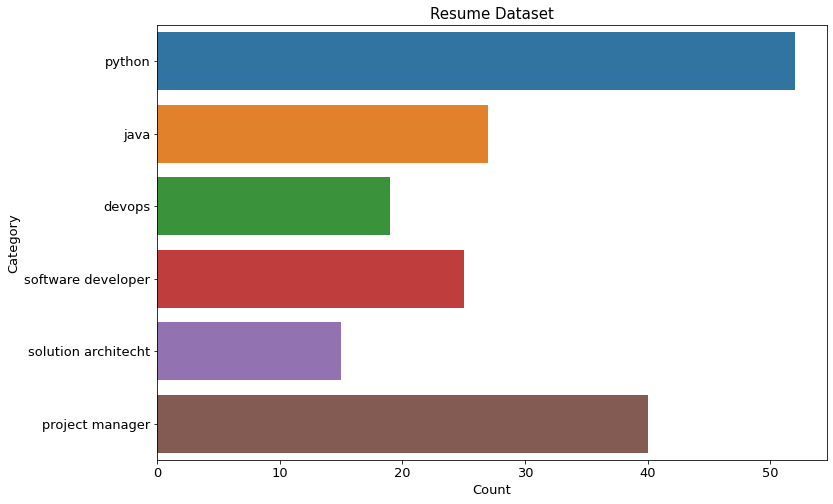

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure()
fig.set_size_inches(12,8)


ax = sns.barplot(x= "Count", y="Category", data= df , orient='h')
ax.set_title("Resume Dataset",fontsize=15)
ax.set_ylabel("Category",size=13,)
ax.set_xlabel("Count",size=13)
ax.tick_params(labelsize=13)


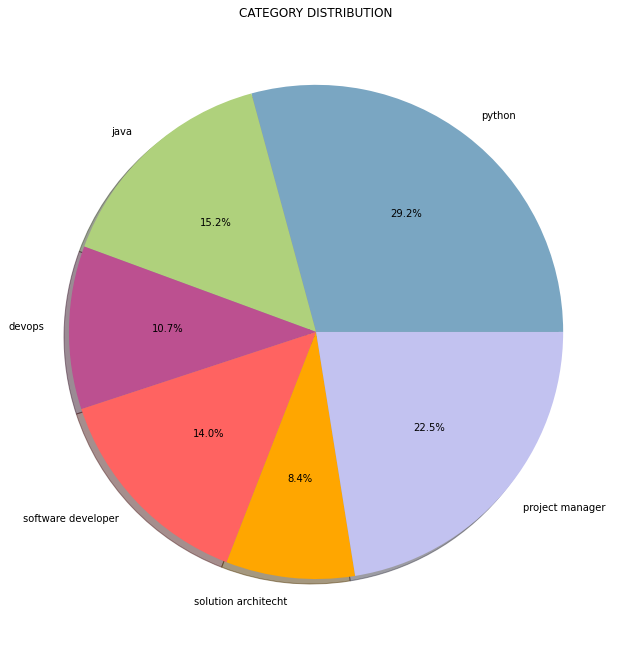

In [26]:
from matplotlib.gridspec import GridSpec
import numpy as np

targetCounts = df['Count']
targetLabels  = df['Category']
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('coolwarm')
colors = ['#7aa6c2','#afd17c','#bc5090','#ff6361','#ffa600','#c2c2f0', '#c2c2f0','#ffb3e6']
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()


### ***Reading different resume format and creating a resume dataset***

---

In [14]:
import os
path = "/content/drive/MyDrive/resumes"
directories = os.listdir(path)
directories

['python',
 'java',
 'devops',
 'software developer',
 'solution architecht',
 'project manager',
 'Skills_keywords.csv']

In [13]:
from docx2python import docx2python
import pathlib
import fitz
import aspose.words as aw
import os


def get_resumes(file_path):
    file_type = pathlib.Path(file_path).suffix
    
    if file_type == '.doc' : 
        doc = aw.Document(file_path)
        file_name = file_path.replace('.doc','')
        doc.save(file_name +".docx")
        os.remove(file_path)

    elif file_type == '.docx':   
      doc_result = docx2python(file_path)
      text = doc_result.text
      return text

    elif file_type == '.pdf': 
      doc = fitz.open(file_path)
      text = ""
      for page in doc:
        text+=page.getText()
      return text


In [16]:
resume_dict = {}

for category in directories[:-1]:
  child_path = "/content/drive/MyDrive/resumes/"+ category
  resumes = os.listdir(child_path)
  
  resume_list = list()

  for resume in resumes:
    resume_path = child_path + '/' + resume
    text = get_resumes(resume_path)
    resume_list.append(text)

  print(category, 'count -', len(resume_list))
  resume_dict[category] = resume_list
 

python count - 52
java count - 27
devops count - 19
software developer count - 25
solution architecht count - 15
project manager count - 40


In [55]:
category, resume_text = list(),list()

for key, value in resume_dict.items():
  for resume in value:
    category.append(key)
    resume_text.append(resume)


In [56]:
df = pd.DataFrame(list(zip(category,resume_text)),columns =['Category','Resume'])
df.to_csv('resume_dataset.csv',index=False)

In [57]:
import pandas as pd
df = pd.read_csv('/content/resume_dataset.csv')
df

,Category,Resume
0,python,MD ZAFAR AQUBAL \n zafariq998...
1,python,Krishna Gopal Tailor \nSenior Software Enginee...
2,python,Last Updated on 4th January 2022 \nAbhay Tiwar...
3,python,C 09/2022 - 12/2022\n+\n-\n-\n-\n-\n-\nC 07/20...
4,python,\n \nABHISHEK SINHA \n +91 6263551263 \n∞ ww...
...,...,...
173,project manager,"ABOUT ME\nOver 20 years working in technology,..."
174,project manager,\nPage| 1 \n \nJennifer Scriven \nProject M...
175,project manager,SUSMITA DUBEY ...
176,project manager,\t\t\t\t\n\nHamidreza Bagherzadeh\n\nSveavagen...


### ***Cleaning of resume text in the resume dataset***

---

In [114]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [129]:
import pandas as pd
df = pd.read_csv('/content/resume_dataset.csv') 
df = df.replace(to_replace='None', value=np.nan).dropna()
df.head()

,Category,Resume
0,python,MD ZAFAR AQUBAL \n zafariq998...
1,python,Krishna Gopal Tailor \nSenior Software Enginee...
2,python,Last Updated on 4th January 2022 \nAbhay Tiwar...
3,python,C 09/2022 - 12/2022\n+\n-\n-\n-\n-\n-\nC 07/20...
4,python,\n \nABHISHEK SINHA \n +91 6263551263 \n∞ ww...


In [105]:
len(df)

167

In [107]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    

In [119]:
for index, row in df.iterrows():
    resume_text = row['Resume']
    cleaned_text = cleanResume(resume_text)
    df.loc[index]['Resume'] = cleaned_text


In [120]:
df.head()

,Category,Resume
0,python,MD ZAFAR AQUBAL zafariq9988 Python Developer 9...
1,python,Krishna Gopal Tailor Senior Software Engineer ...
2,python,Last Updated on 4th January 2022 Abhay Tiwari ...
3,python,C 09 2022 12 2022 C 07 2021 08 2022 C 07 2015 ...
4,python,ABHISHEK SINHA 91 6263551263 www linkedin com...


In [122]:
df.to_csv('resume_dataset_cleaned.csv',index=False)

In [124]:
import pandas as pd
df = pd.read_csv('/content/resume_dataset_cleaned.csv')
print(len(df))
df.head()

167


,Category,Resume
0,python,MD ZAFAR AQUBAL zafariq9988 Python Developer 9...
1,python,Krishna Gopal Tailor Senior Software Engineer ...
2,python,Last Updated on 4th January 2022 Abhay Tiwari ...
3,python,C 09 2022 12 2022 C 07 2021 08 2022 C 07 2015 ...
4,python,ABHISHEK SINHA 91 6263551263 www linkedin com...


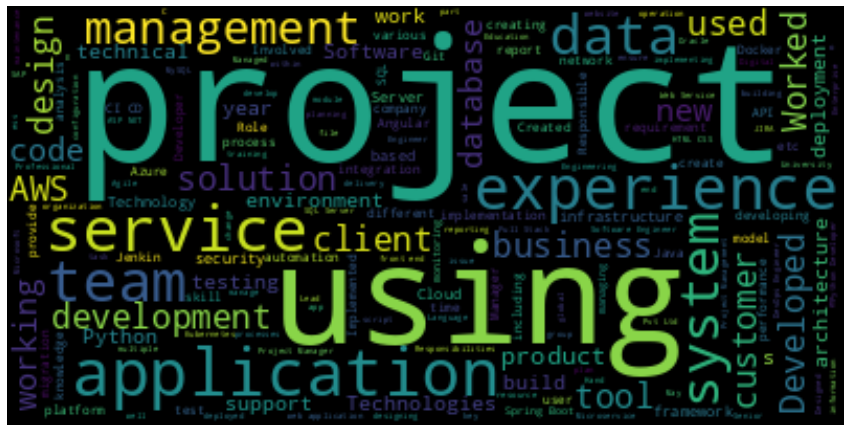

In [127]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])

totalWords =[]
Sentences = df['Resume'].values

cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()



In [128]:
print(mostcommon)

[('using', 1009), ('AWS', 624), ('Project', 545), ('project', 470), ('application', 465), ('I', 461), ('Java', 461), ('Python', 451), ('data', 438), ('management', 421), ('Management', 405), ('development', 403), ('SQL', 381), ('team', 380), ('Azure', 376), ('experience', 375), ('Developer', 350), ('Cloud', 346), ('Spring', 340), ('new', 321), ('applications', 320), ('business', 311), ('services', 308), ('Experience', 292), ('Software', 287), ('Docker', 287), ('based', 285), ('Web', 276), ('2021', 272), ('web', 270), ('A', 269), ('code', 268), ('like', 261), ('API', 260), ('design', 257), ('Data', 246), ('system', 245), ('cloud', 242), ('Development', 238), ('testing', 235), ('2019', 233), ('used', 232), ('Technologies', 231), ('Engineer', 230), ('tools', 229), ('Jenkins', 229), ('Services', 225), ('projects', 225), ('C', 225), ('end', 224)]


### ***Data preprocessing and feature extraction***

---

In [141]:
import pandas as pd
df = pd.read_csv('/content/resume_dataset_cleaned.csv')
print(len(df))
df.head()

167


,Category,Resume
0,python,MD ZAFAR AQUBAL zafariq9988 Python Developer 9...
1,python,Krishna Gopal Tailor Senior Software Engineer ...
2,python,Last Updated on 4th January 2022 Abhay Tiwari ...
3,python,C 09 2022 12 2022 C 07 2021 08 2022 C 07 2015 ...
4,python,ABHISHEK SINHA 91 6263551263 www linkedin com...


In [143]:
#Creating a column called label, where in each catetogry will be asssigned to one unique value

import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Label']= label_encoder.fit_transform(df['Category'])

datasets = df.groupby(['Category','Label'],as_index = False)['Resume'].count()
datasets

,Category,Label,Resume
0,devops,0,18
1,java,1,27
2,project manager,2,37
3,python,3,50
4,software developer,4,22
5,solution architecht,5,13


In [144]:
#Iterating each category and keeping 75% label to train and 25% label to test

from sklearn.model_selection import train_test_split
cat_nos = len(df['Label'].unique())
X_train, X_test, y_train, y_test = [list() for i in range(0,4)]

for i in range(cat_nos):
  X = df[df.label == i]['Resume'].tolist()
  Y = df[df.label == i]['Label'].tolist()
  x_train, x_test, ytrain, ytest = train_test_split(X,Y,train_size=0.75, random_state=42)

  [X_train.append(i ) for i in x_train]
  [X_test.append(i ) for i in x_test]
  [y_train.append(i ) for i in ytrain]
  [y_test.append(i ) for i in ytest]


In [145]:
#Checking labels split 

import numpy as np

values, counts = np.unique(y_test,return_counts=True)
values1, counts1 = np.unique(y_train,return_counts=True)
print('Category      - ',values)
print('Train label   - ',counts1)
print('Test  label   - ',counts)
print('Total         - ',counts1 + counts)

Category      -  [0 1 2 3 4 5]
Train label   -  [13 20 27 37 16  9]
Test  label   -  [ 5  7 10 13  6  4]
Total         -  [18 27 37 50 22 13]


In [146]:
#Applying TF_IDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer( sublinear_tf=True, stop_words='english', max_features=1500)

features_train = tfidfvectorizer.fit_transform(X_train)
X_train = features_train.toarray()

# features_test = tfidfvectorizer.transform(X_test)
# X_test = features_test.toarray()


In [147]:
import pickle
pickle.dump(tfidfvectorizer, open("tfidf.pickle", "wb"))

In [148]:
with open('/content/tfidf.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [149]:
features_test = b.transform(X_test)
X_test = features_test.toarray()

In [156]:
X_test

array([[0.        , 0.11946893, 0.05692759, ..., 0.04582169, 0.02478247,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08337757, 0.05589335,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01180554,
        0.        ],
       ...,
       [0.02478684, 0.07415535, 0.02841813, ..., 0.        , 0.02596268,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06597211,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03422658,
        0.        ]])

### ***Training using Random forest***

---



In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

rfclf = RandomForestClassifier(random_state =  9)
rfclf = rfclf.fit(X_train, y_train)


In [151]:
import pickle
pickle.dump(rfclf, open("rfclf.pickle", "wb"))

In [152]:
with open('/content/rfclf.pickle', 'rb') as handle:
    rf = pickle.load(handle)

In [153]:
print('score - ',rf.score(X_test, y_test)*100)

y_test = np.array(y_test)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)*100
print('accuracy - ',accuracy)

score -  82.22222222222221
accuracy -  82.22222222222221


In [157]:
print('\033[1m' + 'Random forest classifier\n '+ '\033[0m')
print('labels which predicted wrong\n')


predicted_wrong = 0
for i in range(len(y_test)):
  if(y_test[i] != y_pred[i]):

    org_label_name = datasets[datasets['Label'] == y_test[i]]['Category'].tolist()[0]
    pred_label_name = datasets[datasets['Label'] == y_pred[i]]['Category'].tolist()[0]

    print('Orginal label - ' + str(y_test[i]) + ' ' + org_label_name +' | Predicted label - ' + str(y_pred[i]) +' '  + pred_label_name )
    predicted_wrong += 1


print('\nTot no of labels used for training         - ',len(y_train))
print('\nTot no of labels used for testing          - ',len(y_test))
print('\nTot no of labels which predicted correctly - ',len(y_test) - predicted_wrong)
print('\nTot no of labels which predicted wrong     - ',predicted_wrong)
print('\naccuracy - ',accuracy)

Random forest classifier
 
labels which predicted wrong

Orginal label - 0 devops | Predicted label - 2 project manager
Orginal label - 0 devops | Predicted label - 3 python
Orginal label - 1 java | Predicted label - 3 python
Orginal label - 4 software developer | Predicted label - 1 java
Orginal label - 5 solution architecht | Predicted label - 2 project manager
Orginal label - 5 solution architecht | Predicted label - 2 project manager
Orginal label - 5 solution architecht | Predicted label - 2 project manager
Orginal label - 5 solution architecht | Predicted label - 2 project manager

Tot no of labels used for training         -  122

Tot no of labels used for testing          -  45

Tot no of labels which predicted correctly -  37

Tot no of labels which predicted wrong     -  8

accuracy -  82.22222222222221


### ***Training using SVM Classfier***

In [158]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score 
import numpy as np

svm_clf = SVR(kernel = 'linear')
svm_clf = svm_clf.fit(X_train,y_train)

print('score - ',svm_clf.score(X_test, y_test))

y_test = np.array(y_test)
y_pred = svm_clf.predict(X_test)

#print(y_pred.round())

accuracy = accuracy_score(y_test,y_pred.round())*100
print('accuracy - ',accuracy)

score -  0.4071273144679347
accuracy -  51.11111111111111
